In [1]:
# Dependencies
%matplotlib inline
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import requests
from splinter import Browser
import time
import pandas as pd

In [3]:
home_df = pd.read_csv("dataframes/2018_homeless_data.csv")
home_df = home_df.rename(columns={'Unnamed: 0': 'State'})
home_df.head()

,State,Nighttime Residence: Doubled up,Nighttime Residence: Hotels/motels,Nighttime Residence: Shelters,Nighttime Residence: Unsheltered,Persons Experiencing Chronic Homelessness,Total Family Households Experiencing Homelessness,Total Homeless Population,Total Number of Homeless Students,Total Number of Unaccompanied Homeless Students,Unaccompanied Young Adults (Aged 18-24) Experiencing Homelessness,Veterans Experiencing Homelessness,Percentage of Homeless Population
0,Alabama,12021,681,735,675,540,280,3434,14112,583,158,339,0.622343
1,Alaska,2257,270,920,337,357,193,2016,3784,877,163,132,0.365359
2,Arizona,15049,1404,6146,577,1774,792,9865,24770,2850,638,893,1.787831
3,Arkansas,10178,524,1014,268,466,147,2712,11984,592,240,251,0.491495
4,California,211607,10095,17061,7533,34332,6702,129972,246296,7495,12396,10836,23.554784


In [41]:
# Read csv containing median household prices for each state by year
avg_median_hs_pr_df = pd.read_csv("../Desthy/Dataframes/State_MedianListingPrice_AllHomes.csv") 
avg = avg_median_hs_pr_df.rename(columns={'State':'RegionName', 'State Full Name':'State'})

In [42]:
avg

,RegionName,State,SizeRank,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,CA,California,1,331354.1667,296987.5000,308158.8333,390208.2500,418516.6667,440640.6667,479724.9167,500381.4583,527849.1667,533111.250
1,TX,Texas,2,171324.5833,168918.6667,172219.1667,187101.3333,212438.3333,245033.0833,255709.7500,268202.7917,275731.6667,278067.500
2,NY,New York,3,345016.5833,317552.0000,306182.5000,305825.0000,324191.5833,330624.3333,340693.0417,352726.0417,387716.6667,414725.000
3,FL,Florida,4,187158.3333,175891.5833,179162.5000,198024.1667,215341.6667,236499.0000,259156.6667,279908.7500,291312.1667,295975.000
4,IL,Illinois,5,204158.3333,176166.6667,159783.3333,164489.5833,180408.3333,192858.3333,202632.3333,215231.2500,228915.8333,235975.000
5,PA,Pennsylvania,6,186962.5000,178566.6667,171979.1667,172991.6667,177750.0000,180691.6667,180399.7500,192341.6667,205521.4583,209950.000
6,OH,Ohio,7,129175.0000,123733.2500,122783.2500,124506.2500,131191.6667,136029.1667,141320.8333,152181.4167,163604.1667,169950.000
7,MI,Michigan,8,122058.3333,110011.5000,108195.7500,122325.0000,133141.6667,141116.6667,149641.6667,165650.0000,177983.2500,178675.000
8,GA,Georgia,9,172933.3333,152761.6667,152765.7500,173233.5833,184406.4167,194624.0000,211796.7500,232963.2917,250514.9167,256897.500
9,NC,North Carolina,10,197000.0000,187466.6667,182217.9167,192153.7500,198055.3333,212520.8333,227766.5833,246175.0000,260150.1250,267972.500


In [43]:
avg[['State', '2017']].head()

,State,2017
0,California,500381.4583
1,Texas,268202.7917
2,New York,352726.0417
3,Florida,279908.7500
4,Illinois,215231.2500


In [44]:
avg.head()

,RegionName,State,SizeRank,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,CA,California,1,331354.1667,296987.5000,308158.8333,390208.2500,418516.6667,440640.6667,479724.9167,500381.4583,527849.1667,533111.25
1,TX,Texas,2,171324.5833,168918.6667,172219.1667,187101.3333,212438.3333,245033.0833,255709.7500,268202.7917,275731.6667,278067.50
2,NY,New York,3,345016.5833,317552.0000,306182.5000,305825.0000,324191.5833,330624.3333,340693.0417,352726.0417,387716.6667,414725.00
3,FL,Florida,4,187158.3333,175891.5833,179162.5000,198024.1667,215341.6667,236499.0000,259156.6667,279908.7500,291312.1667,295975.00
4,IL,Illinois,5,204158.3333,176166.6667,159783.3333,164489.5833,180408.3333,192858.3333,202632.3333,215231.2500,228915.8333,235975.00


In [45]:
home_df22 = pd.merge(avg[['State', '2017']], home_df)
home_df22.head()

,State,2017,Nighttime Residence: Doubled up,Nighttime Residence: Hotels/motels,Nighttime Residence: Shelters,Nighttime Residence: Unsheltered,Persons Experiencing Chronic Homelessness,Total Family Households Experiencing Homelessness,Total Homeless Population,Total Number of Homeless Students,Total Number of Unaccompanied Homeless Students,Unaccompanied Young Adults (Aged 18-24) Experiencing Homelessness,Veterans Experiencing Homelessness,Percentage of Homeless Population
0,California,500381.4583,211607,10095,17061,7533,34332,6702,129972,246296,7495,12396,10836,23.554784
1,Texas,268202.7917,91348,8263,11474,4591,3404,1917,25310,115676,18089,1379,1935,4.586923
2,New York,352726.0417,88580,2623,43102,6068,7195,16368,91897,140373,11800,2941,1224,16.654464
3,Florida,279908.7500,53582,8113,8346,2001,5302,2757,31030,72042,6679,1892,2543,5.623557
4,Illinois,215231.2500,42223,1795,5674,447,1625,1223,10643,50949,5166,684,804,1.928827


In [46]:
home_df2 = home_df22.rename(columns={'2017': 'Average Median House Price'})
home_df2

,State,Average Median House Price,Nighttime Residence: Doubled up,Nighttime Residence: Hotels/motels,Nighttime Residence: Shelters,Nighttime Residence: Unsheltered,Persons Experiencing Chronic Homelessness,Total Family Households Experiencing Homelessness,Total Homeless Population,Total Number of Homeless Students,Total Number of Unaccompanied Homeless Students,Unaccompanied Young Adults (Aged 18-24) Experiencing Homelessness,Veterans Experiencing Homelessness,Percentage of Homeless Population
0,California,500381.4583,211607,10095,17061,7533,34332,6702,129972,246296,7495,12396,10836,23.554784
1,Texas,268202.7917,91348,8263,11474,4591,3404,1917,25310,115676,18089,1379,1935,4.586923
2,New York,352726.0417,88580,2623,43102,6068,7195,16368,91897,140373,11800,2941,1224,16.654464
3,Florida,279908.7500,53582,8113,8346,2001,5302,2757,31030,72042,6679,1892,2543,5.623557
4,Illinois,215231.2500,42223,1795,5674,447,1625,1223,10643,50949,5166,684,804,1.928827
5,Pennsylvania,192341.6667,14362,1490,7016,296,1408,1760,13512,23164,4101,684,982,2.448775
6,Ohio,152181.4167,22533,1607,4852,411,730,1015,10249,29403,2579,686,749,1.857423
7,Michigan,165650.0000,27923,2514,8044,611,861,965,8351,39092,5400,604,693,1.513449
8,Georgia,232963.2917,27543,6700,3499,732,1080,812,9499,38474,2331,494,705,1.721501
9,North Carolina,246175.0000,19131,3565,2667,1163,1293,897,9268,26361,2675,478,884,1.679637


In [47]:
State_Pop_df = pd.read_csv("dataframes/State_Population.csv") 

In [48]:
State_Pop_df_re = State_Pop_df.rename(columns={'STATE':'State'})

In [49]:
State_Pop_df_re[['State', '2017']].head()

,State,2017
0,Alabama,4850771.0
1,Alaska,738565.0
2,Arizona,6809946.0
3,Arkansas,2977944.0
4,California,38982847.0


In [50]:
test_merg = pd.merge(State_Pop_df_re[['State', '2017']], home_df2)
# pd.merge(Poll_avg_df, new_Pop_df, on="Year")
test_merg = test_merg.rename(columns={'2017': '2017 Population'})

In [51]:
test_merg.head()

,State,2017 Population,Average Median House Price,Nighttime Residence: Doubled up,Nighttime Residence: Hotels/motels,Nighttime Residence: Shelters,Nighttime Residence: Unsheltered,Persons Experiencing Chronic Homelessness,Total Family Households Experiencing Homelessness,Total Homeless Population,Total Number of Homeless Students,Total Number of Unaccompanied Homeless Students,Unaccompanied Young Adults (Aged 18-24) Experiencing Homelessness,Veterans Experiencing Homelessness,Percentage of Homeless Population
0,Alabama,4850771.0,189645.2083,12021,681,735,675,540,280,3434,14112,583,158,339,0.622343
1,Alaska,738565.0,272724.0833,2257,270,920,337,357,193,2016,3784,877,163,132,0.365359
2,Arizona,6809946.0,271341.5833,15049,1404,6146,577,1774,792,9865,24770,2850,638,893,1.787831
3,Arkansas,2977944.0,162429.8333,10178,524,1014,268,466,147,2712,11984,592,240,251,0.491495
4,California,38982847.0,500381.4583,211607,10095,17061,7533,34332,6702,129972,246296,7495,12396,10836,23.554784


In [52]:
test_merg['Percentage Homeless'] = test_merg['Total Homeless Population']/test_merg['2017 Population'] * 100

In [53]:
test_merg

,State,2017 Population,Average Median House Price,Nighttime Residence: Doubled up,Nighttime Residence: Hotels/motels,Nighttime Residence: Shelters,Nighttime Residence: Unsheltered,Persons Experiencing Chronic Homelessness,Total Family Households Experiencing Homelessness,Total Homeless Population,Total Number of Homeless Students,Total Number of Unaccompanied Homeless Students,Unaccompanied Young Adults (Aged 18-24) Experiencing Homelessness,Veterans Experiencing Homelessness,Percentage of Homeless Population,Percentage Homeless
0,Alabama,4850771.0,189645.2083,12021,681,735,675,540,280,3434,14112,583,158,339,0.622343,0.070793
1,Alaska,738565.0,272724.0833,2257,270,920,337,357,193,2016,3784,877,163,132,0.365359,0.272962
2,Arizona,6809946.0,271341.5833,15049,1404,6146,577,1774,792,9865,24770,2850,638,893,1.787831,0.144862
3,Arkansas,2977944.0,162429.8333,10178,524,1014,268,466,147,2712,11984,592,240,251,0.491495,0.091070
4,California,38982847.0,500381.4583,211607,10095,17061,7533,34332,6702,129972,246296,7495,12396,10836,23.554784,0.333408
5,Colorado,5436519.0,401741.1667,17146,2205,2837,826,2738,990,10857,23014,2034,593,1073,1.967611,0.199705
6,Connecticut,3594478.0,307275.0000,2702,396,2492,121,341,553,3976,6260,174,187,190,0.720569,0.110614
7,Delaware,943732.0,274681.6667,2449,561,202,15,189,125,1082,3227,324,53,70,0.196091,0.114651
8,Florida,20278447.0,279908.7500,53582,8113,8346,2001,5302,2757,31030,72042,6679,1892,2543,5.623557,0.153020
9,Georgia,10201635.0,232963.2917,27543,6700,3499,732,1080,812,9499,38474,2331,494,705,1.721501,0.093113


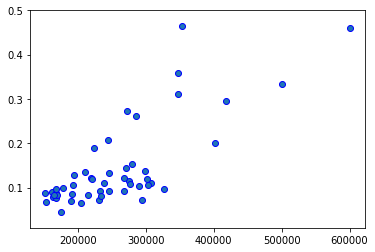

In [54]:
#should do percentage homeless population versus median house price 
#some states have larger populations so a comparison on numbers alone would not be the most accurate comparison.

plt.scatter(test_merg['Average Median House Price'], test_merg['Percentage Homeless'], marker='o', edgecolors= 'b')